In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
# Handling missing data

df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

<Axes: >

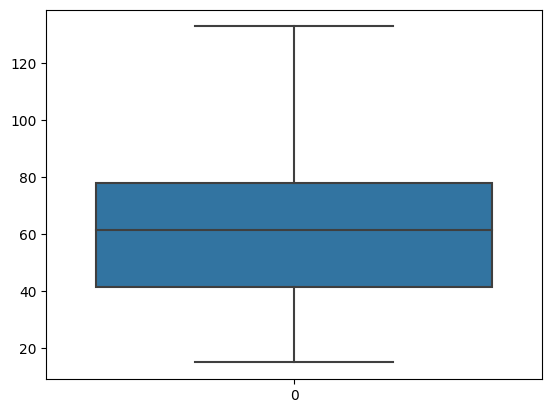

In [20]:
# outliers detection and removal

sb.boxplot(df['Annual Income (k$)'])

In [21]:
q1 = df['Annual Income (k$)'].quantile(0.25)
q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = q3  - q1
lower_limit = q1 - 1.5*IQR
lower_limit

-13.25

In [22]:
upper_limit = q3 + 1.5*IQR
upper_limit

132.75

In [23]:
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)']>upper_limit,132.75,df['Annual Income (k$)'])

<Axes: >

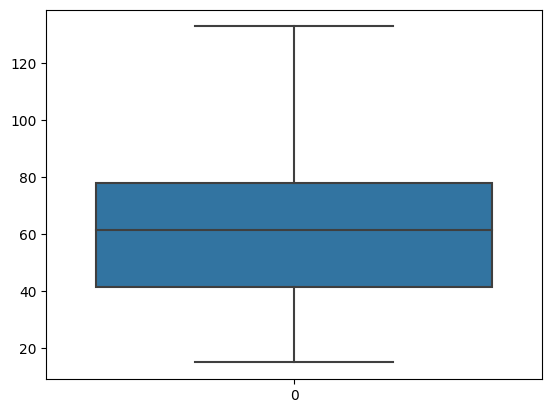

In [24]:
sb.boxplot(df['Annual Income (k$)'])

In [26]:
# encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [29]:
#Extracting Independent variable
X= df.iloc[:, :-1].values

#Extracting Dependent variable
y= df.iloc[:, 4].values



In [30]:
# splitting into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)


In [31]:

y_train.shape

(140,)

In [34]:
# feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [36]:
X_train


array([[ 0.27949921, -0.90453403,  0.81961441,  0.20094935],
       [ 0.12380999,  1.1055416 ,  1.95796776,  0.0470073 ],
       [-0.13567203,  1.1055416 , -1.15353139, -0.06844923],
       [ 1.10984169, -0.90453403, -0.47051938,  0.93217405],
       [ 1.55961053, -0.90453403, -0.09106827,  1.97128284],
       [-0.60273967,  1.1055416 , -1.53298251, -0.53027536],
       [ 1.07524408, -0.90453403, -0.24284871,  0.89368854],
       [ 0.1930052 , -0.90453403, -1.60887273,  0.12397832],
       [-0.62003848, -0.90453403,  2.18563843, -0.53027536],
       [-0.63733728, -0.90453403,  0.28838285, -0.53027536],
       [ 0.29679801,  1.1055416 , -0.92586072,  0.20094935],
       [-1.12170372, -0.90453403, -0.24284871, -0.95361598],
       [ 1.61150694, -0.90453403,  0.4401633 ,  2.47159448],
       [ 1.00604888, -0.90453403, -0.77408028,  0.66277547],
       [-0.06647682,  1.1055416 , -1.45709229, -0.02996372],
       [ 0.85035966, -0.90453403,  0.36427307,  0.62428996],
       [-0.34325765, -0.

In [37]:

from sklearn import cluster

error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(X)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [38]:
error

[841544.34375,
 253464.4969621961,
 137913.08082474925,
 94787.36562149582,
 73742.78038608376,
 62563.821547613865,
 53566.36728312537,
 44554.99828702504,
 38384.16396961386,
 34554.484111246944]

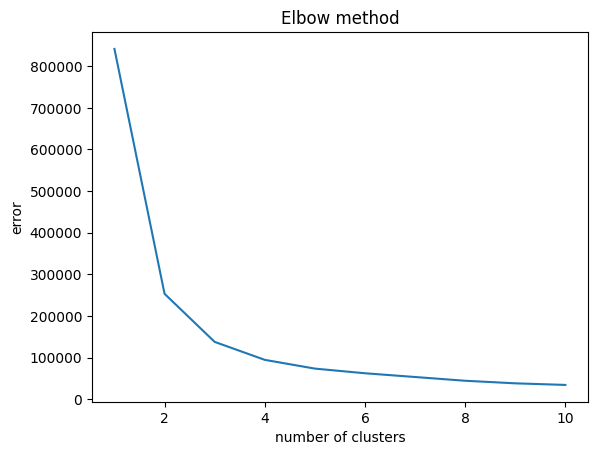

In [39]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()


In [40]:
km_model = cluster.KMeans(n_clusters=3,init = 'k-means++',random_state=0)
km_model.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [42]:

pred = km_model.predict(X)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [43]:
km_model.predict([[1.1,2.2,4.3,4.4]])

array([2], dtype=int32)

In [44]:
km_model.predict([[2.2,2.0,1.1,1.2]])

array([2], dtype=int32)